# Randomizing Load Curves

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime
import scipy
import seaborn as sns

In [2]:
df = pd.read_csv('../data/claes_test.csv', index_col=0, parse_dates=True)
df.drop(columns='V3', inplace=True)

In [3]:
# A function to copy a load profile with stochastic deviation
# from the original. The values varies according to a gaussian 
# distribution, with default and mu = 0, sigma = 0.1. The
# funtion returns a copy of the dataframe with the new column. 

def copy_load_stochastic(dataframe, column_name, sigma=0.1):
    
    min_prob, max_prob = -sigma, sigma
    prob_array = (max_prob - min_prob) * np.random.random_sample(size=dataframe.shape[0]) + min_prob
    new_col_name = column_name + '_stoch_copy'
    dataframe[new_col_name] = dataframe[column_name] + dataframe[column_name].mul(prob_array)
    
    return dataframe

In [4]:
df_with_copy = copy_load_stochastic(df, 'V4',sigma=0.5)

In [5]:
df_with_copy.head()

,Temperature,V2,V4,V5,V6,V7,V8,V9,V10,aggLoad,V4_stoch_copy
TimeDate,,,,,,,,,,,
2018-04-24 00:00:00,0.1,2.7,2.72,2.6,1.4,1.2,1.1,1.3,1.6,14.62,2.986744
2018-04-24 01:00:00,0.0,2.6,2.39,3.2,1.0,1.2,1.1,1.2,1.4,14.09,3.453055
2018-04-24 02:00:00,0.0,2.8,1.79,3.0,1.3,1.1,1.1,1.4,1.3,13.79,1.144303
2018-04-24 03:00:00,-0.1,2.6,1.78,3.0,1.3,1.2,1.1,1.9,1.1,13.98,1.852850
2018-04-24 04:00:00,-0.1,2.6,2.07,3.3,0.8,1.2,1.1,1.2,1.1,13.37,2.224315


In [ ]:
df_with_copy['Year'] = df_with_copy.index.year
df_with_copy['Month'] = df_with_copy.index.month
df_with_copy['Weekday Name'] = df_with_copy.index.weekday_name

C:\Users\bas35\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


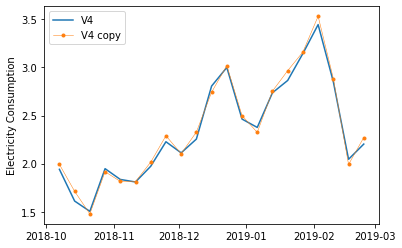

In [7]:
y1 = df_with_copy['V4'].resample('W').mean()
y2 = df_with_copy['V4_stoch_copy'].resample('W').mean()

fig, ax = plt.subplots()
ax.plot(y1.loc['2018-10':'2019-02'], label='V4')
ax.plot(y2.loc['2018-10':'2019-02'], marker='.', linestyle='-', linewidth=0.5, label='V4 copy')
ax.set_ylabel('Electricity Consumption')
ax.legend();

# Creating Electrical Substation

In [9]:
def input_allocation_dict(load_type_list):
    allocation_dict = dict()
    for load in load_type_list:
        allocation_dict[load] = int(input('Number of '+ load + ': '))
    return allocation_dict
    

In [21]:
# Returns an updated dataframe object with
# a new profile added according to the input parameters. 

def read_LP(dataframe,load_type, num):
    path = None #Finding the csv-path. Fix better solution later. .json?
    num_list = [i for i in range(0,num +1)]
    if load_type == 'house_new':         
        path = '../data/new_houses.csv'
    elif load_type == 'house_old':
        path = '../data/old_houses.csv'
    elif load_type == 'house_mix_DH':
        path = '../data/mixed_ages_houses_district_heating.csv'
    elif load_type == 'appart_DH':
        path = '../data/new_appartments_district_heating.csv'
    
    if path != None:
        LP_cols = pd.read_csv(path, index_col = 0, 
                              parse_dates = True, 
                              usecols = num_list) # Fix for out of range. Use stochastic copy?
        LP_cols.columns = [load_type + str(i) for i in np.arange(1,len(LP_cols.columns)+1)]
        
        if dataframe.empty:
            dataframe = LP_cols
        else:  #Inner join for date compatability. Needs fixing if changing index structure!!
            dataframe = dataframe.merge(LP_cols, how = 'inner', left_index=True, right_index=True)          
    
    return dataframe

In [ ]:
df_LP = create_substation()

In [ ]:
df_LP.index[0].year